<a href="https://colab.research.google.com/github/rutasnim/COVID-19_Lung-_Lesion_Seg/blob/main/HW5_6501.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 8.1 Solution
I am currently looking to buy a house. I would find regression models helpful to evaluate if I am overpaying for a house with house price data. I could make a regression model to predict the house price. The predictors would be useful for this regression model:
1. number of bedroom
2. Parking (Y/N or # of cars )
3. number of bathrooms
4. Finished basement :(Y/N)
5. Crime rate


# 8.2 Solution

### Loading the data

In [4]:
library(tidyverse)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [5]:
#read in the data file
crime_data <- read.table("http://www.statsci.org/data/general/uscrime.txt", stringsAsFactors = FALSE, header = TRUE)

#make sure headers are correct
head(crime_data)

,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>
1,15.1,1,9.1,5.8,5.6,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011,791
2,14.3,0,11.3,10.3,9.5,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999,1635
3,14.2,1,8.9,4.5,4.4,0.533,96.9,18,21.9,0.094,3.3,3180,25.0,0.083401,24.3006,578
4,13.6,0,12.1,14.9,14.1,0.577,99.4,157,8.0,0.102,3.9,6730,16.7,0.015801,29.9012,1969
5,14.1,0,12.1,10.9,10.1,0.591,98.5,18,3.0,0.091,2.0,5780,17.4,0.041399,21.2998,1234
6,12.1,0,11.0,11.8,11.5,0.547,96.4,25,4.4,0.084,2.9,6890,12.6,0.034201,20.9995,682


### Exploratory Data Analysis and Preparation
Lets do some EDA on our dataset. summary() gives the summary of the data

In [6]:
summary(crime_data)

       M               So               Ed             Po1       
 Min.   :11.90   Min.   :0.0000   Min.   : 8.70   Min.   : 4.50  
 1st Qu.:13.00   1st Qu.:0.0000   1st Qu.: 9.75   1st Qu.: 6.25  
 Median :13.60   Median :0.0000   Median :10.80   Median : 7.80  
 Mean   :13.86   Mean   :0.3404   Mean   :10.56   Mean   : 8.50  
 3rd Qu.:14.60   3rd Qu.:1.0000   3rd Qu.:11.45   3rd Qu.:10.45  
 Max.   :17.70   Max.   :1.0000   Max.   :12.20   Max.   :16.60  
      Po2               LF              M.F              Pop        
 Min.   : 4.100   Min.   :0.4800   Min.   : 93.40   Min.   :  3.00  
 1st Qu.: 5.850   1st Qu.:0.5305   1st Qu.: 96.45   1st Qu.: 10.00  
 Median : 7.300   Median :0.5600   Median : 97.70   Median : 25.00  
 Mean   : 8.023   Mean   :0.5612   Mean   : 98.30   Mean   : 36.62  
 3rd Qu.: 9.700   3rd Qu.:0.5930   3rd Qu.: 99.20   3rd Qu.: 41.50  
 Max.   :15.700   Max.   :0.6410   Max.   :107.10   Max.   :168.00  
       NW              U1                U2            

**Observations**:
- There is no NA values.
- Our data needs to be scaled
- `So`, Indicator for Southern state is the variable which only has 0 or 1, This variable wont be scaled

Lets Scale our Data leaving the response variable `Crime` and `So`

### Crime rate Data distribution

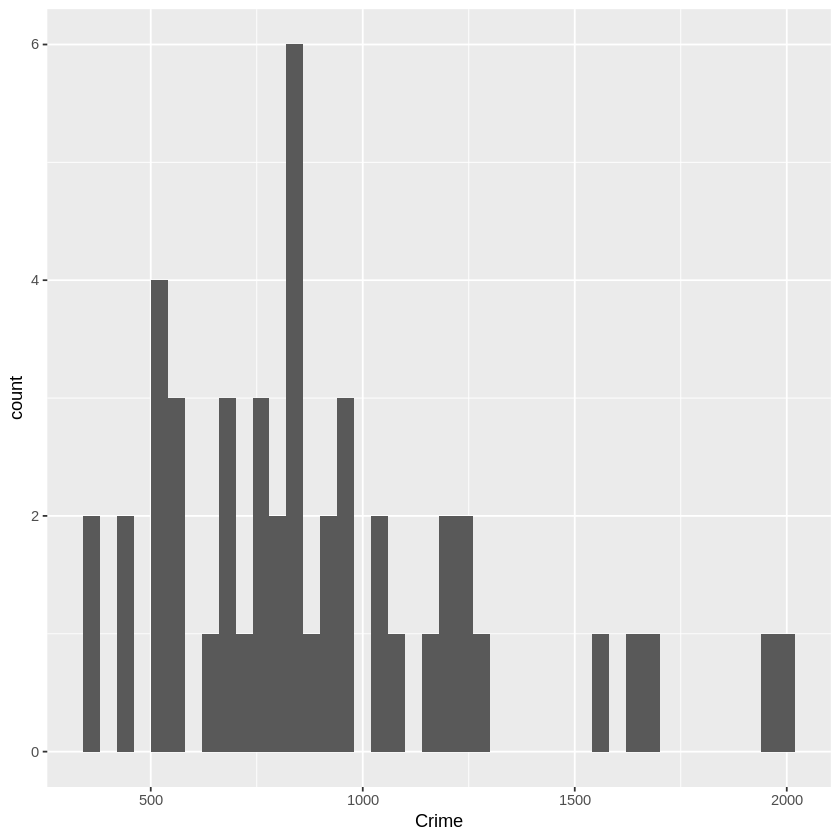

In [7]:
ggplot(data = crime_data) +
  geom_histogram(mapping = aes(x = Crime), binwidth = 40)

Looking at the crime data distribution above. Interesting that the max crime rate in the dataset is almost 8x minimum crime rate. Here is the summary for the crime rate data:


<br>

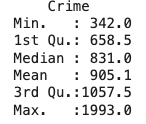


## MODELING

Lets model with all Variables

In [8]:
set.seed(1)

In [9]:
model1 <- lm( Crime ~ ., data = crime_data)
summary(model1)


Call:
lm(formula = Crime ~ ., data = crime_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-395.74  -98.09   -6.69  112.99  512.67 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.984e+03  1.628e+03  -3.675 0.000893 ***
M            8.783e+01  4.171e+01   2.106 0.043443 *  
So          -3.803e+00  1.488e+02  -0.026 0.979765    
Ed           1.883e+02  6.209e+01   3.033 0.004861 ** 
Po1          1.928e+02  1.061e+02   1.817 0.078892 .  
Po2         -1.094e+02  1.175e+02  -0.931 0.358830    
LF          -6.638e+02  1.470e+03  -0.452 0.654654    
M.F          1.741e+01  2.035e+01   0.855 0.398995    
Pop         -7.330e-01  1.290e+00  -0.568 0.573845    
NW           4.204e+00  6.481e+00   0.649 0.521279    
U1          -5.827e+03  4.210e+03  -1.384 0.176238    
U2           1.678e+02  8.234e+01   2.038 0.050161 .  
Wealth       9.617e-02  1.037e-01   0.928 0.360754    
Ineq         7.067e+01  2.272e+01   3.111 0.003983 ** 
Prob        -4.8

#### **Create test Data**

In [10]:
test<-data.frame(M = 14.0,So = 0,Ed = 10.0, Po1 = 12.0,Po2 = 15.5,
                 LF = 0.640, M.F = 94.0,Pop = 150,NW = 1.1,U1 = 0.120,
                 U2 = 3.6, Wealth = 3200,Ineq = 20.1,Prob = 0.04, Time = 39.0)

#### Prediction from Model 1 that was trained with all Variables


In [11]:
pred_model1 <- predict(model1, test)
pred_model1

1 
155.4349

The Prediction Don't look reasonable.
The estimate is less than half of the crime rate of the next-lowest city.

 None of the factor values of the test data point are outside the range of the other data points.

Therefore, lets examine our model:

Our 1st model has a lot of insignificant factors. Let's remove the factors that are statistically insignificant in model 1 (P> 0.1) and make another model

## Model 2

In [12]:
model2 <- lm( Crime ~  M + Ed + Po1 + U2 + Ineq + Prob, data = crime_data)

#Summary of the model

summary(model2)


Call:
lm(formula = Crime ~ M + Ed + Po1 + U2 + Ineq + Prob, data = crime_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-470.68  -78.41  -19.68  133.12  556.23 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5040.50     899.84  -5.602 1.72e-06 ***
M             105.02      33.30   3.154  0.00305 ** 
Ed            196.47      44.75   4.390 8.07e-05 ***
Po1           115.02      13.75   8.363 2.56e-10 ***
U2             89.37      40.91   2.185  0.03483 *  
Ineq           67.65      13.94   4.855 1.88e-05 ***
Prob        -3801.84    1528.10  -2.488  0.01711 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 200.7 on 40 degrees of freedom
Multiple R-squared:  0.7659,	Adjusted R-squared:  0.7307 
F-statistic: 21.81 on 6 and 40 DF,  p-value: 3.418e-11


#### Predict on our test observation

In [13]:


pred_model2 <- predict(model2, test)
pred_model2

1 
1304.245

Model 2 prediction (1304) looks more reasonable with all the insignifcant factors are gone. Note that Model2 has all variables with P< 0.05

### Quality of the models:
Now lets look at quality of the model. The first model R2 on training data was 0.803, and the second was 0.766. But measuring on training data isn't  a good estimate, also because of the possibility of overfitting.

Therefore, We will now cross- validate to estimate the quality of this model :)


In [1]:
# Install the DAAG package

install.packages("DAAG")
library(DAAG)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘interp’, ‘rbibutils’, ‘latticeExtra’, ‘Rdpack’




Warning message in cv.lm(crime_data, model2, m = 5):
“

 As there is >1 explanatory variable, cross-validation
 predicted values for a fold are not a linear function
 of corresponding overall predicted values.  Lines that
 are shown for the different folds are approximate
”



fold 1 
Observations in test set: 9 
                     1        3       17       18        19        22        36
Predicted   810.825487 386.1368 527.3659 800.0046 1220.6767  728.3110 1101.7167
cvpred      785.364736 345.3417 492.2016 700.5751 1240.2916  701.5126 1127.3318
Crime       791.000000 578.0000 539.0000 929.0000  750.0000  439.0000 1272.0000
CV residual   5.635264 232.6583  46.7984 228.4249 -490.2916 -262.5126  144.6682
                   38         40
Predicted   544.37325 1140.79061
cvpred      544.69903 1168.21107
Crime       566.00000 1151.00000
CV residual  21.30097  -17.21107

Sum of squares = 439507.2    Mean square = 48834.14    n = 9 

fold 2 
Observations in test set: 10 
                     4         6       12        25         28        32
Predicted   1897.18657 730.26589 673.3766 579.06379 1259.00338 773.68402
cvpred      1882.73805 781.75573 684.3525 621.37453 1238.31917 788.03429
Crime       1969.00000 682.00000 849.0000 523.00000 1216.00000 754.00000
CV 

M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime,Predicted,cvpred,fold
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
15.1,1,9.1,5.8,5.6,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011,791,810.8255,785.3647,1
14.3,0,11.3,10.3,9.5,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999,1635,1387.8082,1355.7097,5
14.2,1,8.9,4.5,4.4,0.533,96.9,18,21.9,0.094,3.3,3180,25.0,0.083401,24.3006,578,386.1368,345.3417,1
13.6,0,12.1,14.9,14.1,0.577,99.4,157,8.0,0.102,3.9,6730,16.7,0.015801,29.9012,1969,1897.1866,1882.7381,2
14.1,0,12.1,10.9,10.1,0.591,98.5,18,3.0,0.091,2.0,5780,17.4,0.041399,21.2998,1234,1269.8420,1266.7954,3
12.1,0,11.0,11.8,11.5,0.547,96.4,25,4.4,0.084,2.9,6890,12.6,0.034201,20.9995,682,730.2659,781.7557,2
12.7,1,11.1,8.2,7.9,0.519,98.2,4,13.9,0.097,3.8,6200,16.8,0.042100,20.6993,963,733.3799,759.9655,4
13.1,1,10.9,11.5,10.9,0.542,96.9,50,17.9,0.079,3.5,4720,20.6,0.040099,24.5988,1555,1353.5532,1243.1763,3
15.7,1,9.0,6.5,6.2,0.553,95.5,39,28.6,0.081,2.8,4210,23.9,0.071697,29.4001,856,718.7568,723.5331,3


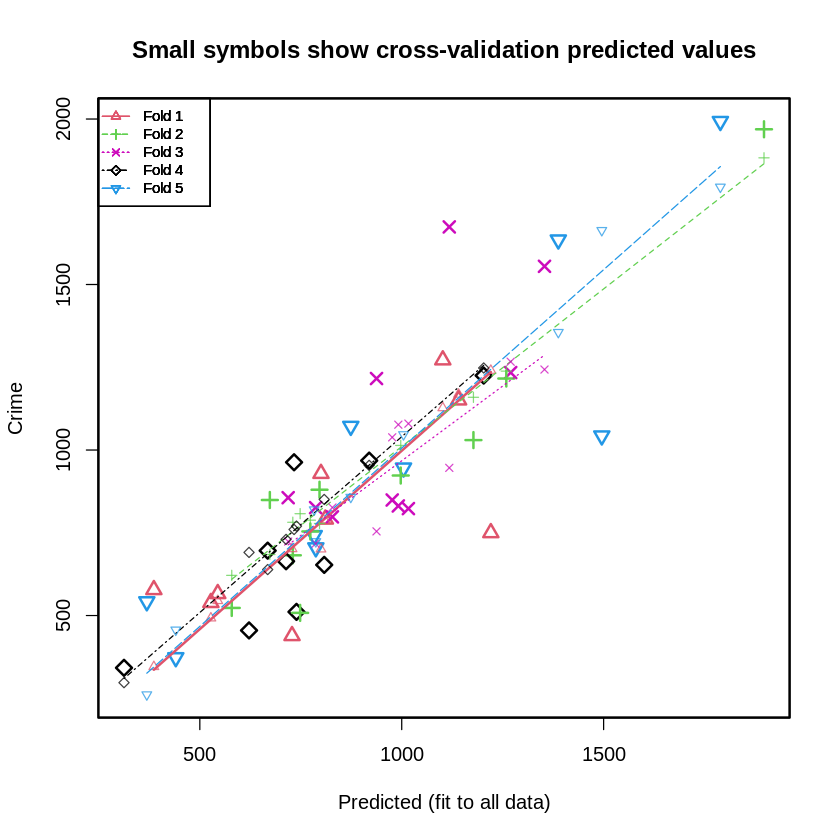

In [14]:
cross_val2 <- cv.lm(crime_data, model2, m=5) # note that here, "m" is used for the number of folds, rather than the usual "k"
cross_val2

In [15]:
cross_val2$ms

NULL